->>>> th: dtw gerarchico  > euclidean kmeans

clustering: 
1. calcolo distanze -> output: matrice distance 
2. capisco qti cluster 
3. matrice -> clustering 

4. visualizzo, ottengo statistiche, blablabla 
4,5. scelgo rappresentanti 
5. weight optimization <- ottimizzazione lineare 
6. arima e backtesting

In [32]:
# Load the cleaned S&P 500 DataFrame from a pickle file
import pandas as pd
import pickle
with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
    df_sp500 = pickle.load(file)
    
# Fill any missing values by forward-filling and then backward-filling
df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\2170963958.py:4: SyntaxWarning: invalid escape sequence '\p'
  with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\2170963958.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\2170963958.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


In [34]:
# Take the first 10 timestamps from df_sp500
df_sp500_first50 = df_sp500.iloc[:10]  # This selects the first 10 rows
df_sp500_first50


Ticker,TSLA,MLM,POOL,PAYX,JCI,GPC,CAH,AJG,DLTR,HOLX,...,RCL,PRU,GRMN,HAS,ESS,NUE,JBHT,AMAT,ACGL,PYPL
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14 00:00:00+00:00,15.137333,98.845337,47.631180,31.855057,29.054077,65.548637,56.079235,36.220329,55.880001,23.920000,...,50.171078,52.597412,37.061481,39.956547,137.822662,38.207870,66.783379,16.996983,18.316668,36.709999
2014-10-15 00:00:00+00:00,15.313333,100.631470,47.970528,31.496561,28.512375,65.820229,55.064140,36.089497,55.240002,23.360001,...,48.691025,51.030968,37.849709,39.592178,138.176483,38.254654,66.946983,17.076080,17.916668,36.709999
2014-10-16 00:00:00+00:00,15.090000,104.286591,51.328083,31.525818,28.497742,66.423729,54.236980,35.885101,55.049999,23.150000,...,49.949516,51.660164,38.397095,39.504738,138.235413,38.628853,67.919609,17.462774,17.766666,36.709999
2014-10-17 00:00:00+00:00,15.165333,108.374489,50.801243,31.825790,29.420084,66.800919,55.357380,36.481945,56.580002,23.860001,...,51.145958,53.128288,38.127060,39.242382,137.630951,38.909504,68.092300,17.471556,18.123333,36.709999
2014-10-20 00:00:00+00:00,15.364667,110.114586,51.337040,32.008709,29.398130,67.472343,55.725842,36.694550,57.340000,24.010000,...,54.265591,53.088989,38.550365,41.180832,139.798157,39.353878,68.046844,17.638535,18.240000,36.709999
2014-10-21 00:00:00+00:00,15.689333,111.458763,52.194275,32.689106,29.939829,69.946709,57.019157,37.005241,58.130001,24.760000,...,56.241947,54.806187,39.302094,42.062592,141.441986,40.297188,69.937569,18.262526,18.549999,36.709999
2014-10-22 00:00:00+00:00,15.406667,109.838356,51.560272,32.711060,29.469252,69.954254,57.146980,37.037941,57.560001,24.309999,...,56.206505,53.993454,39.119648,41.472317,142.238068,40.312782,69.792099,18.007656,18.553333,36.709999
2014-10-23 00:00:00+00:00,15.686000,111.845474,52.087135,32.930553,30.167761,70.007065,57.485340,37.095177,58.509998,24.770000,...,55.205021,54.563679,39.579449,41.887688,143.218475,39.852818,70.482941,18.367979,18.386667,36.709999
2014-10-24 00:00:00+00:00,15.682667,113.180481,51.595978,33.281738,30.579508,70.301285,57.974121,37.446751,58.939999,24.940001,...,57.207970,55.435390,40.331184,41.982441,143.085800,41.154739,70.301147,18.447090,18.559999,36.709999


In [35]:
df_sp500_transposed = df_sp500_first50.T  # Transpose the DataFrame
df_sp500_transposed

Date,2014-10-14 00:00:00+00:00,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,,
TSLA,15.137333,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000
MLM,98.845337,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703
POOL,47.631180,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621
PAYX,31.855057,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584
JCI,29.054077,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816
...,...,...,...,...,...,...,...,...,...,...
NUE,38.207870,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775
JBHT,66.783379,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602
AMAT,16.996983,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028


In [36]:
# Assuming df_sp500 contains stock prices with Date as index and tickers as columns
df = df_sp500_transposed.copy()

In [37]:
df

Date,2014-10-14 00:00:00+00:00,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,,
TSLA,15.137333,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000
MLM,98.845337,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703
POOL,47.631180,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621
PAYX,31.855057,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584
JCI,29.054077,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816
...,...,...,...,...,...,...,...,...,...,...
NUE,38.207870,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775
JBHT,66.783379,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602
AMAT,16.996983,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028


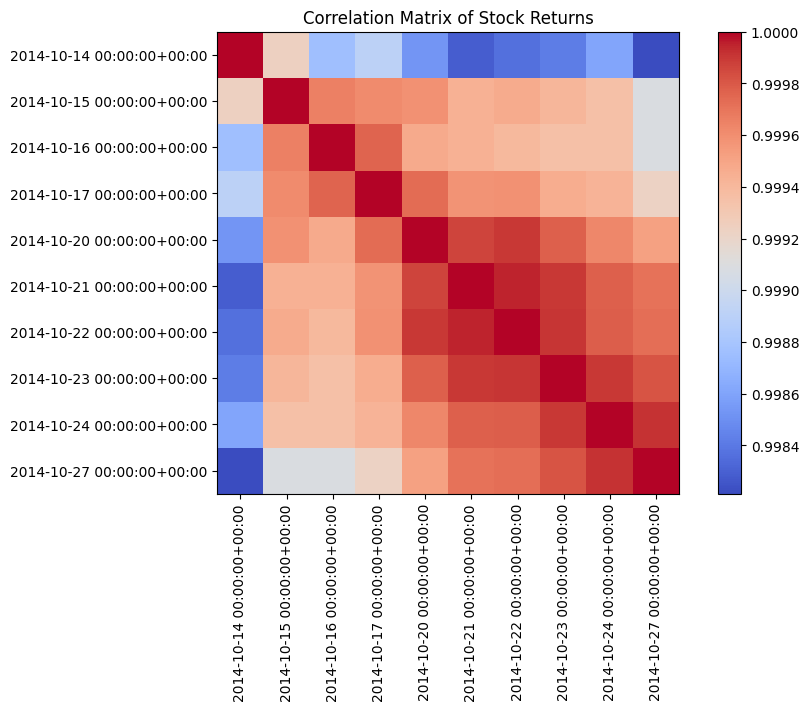

Most representative stocks of the S&P 500 index based on PCA:
Date
2014-10-20 00:00:00+00:00    0.318932
2014-10-24 00:00:00+00:00    0.317573
2014-10-22 00:00:00+00:00    0.317342
2014-10-27 00:00:00+00:00    0.317303
2014-10-17 00:00:00+00:00    0.317178
dtype: float64


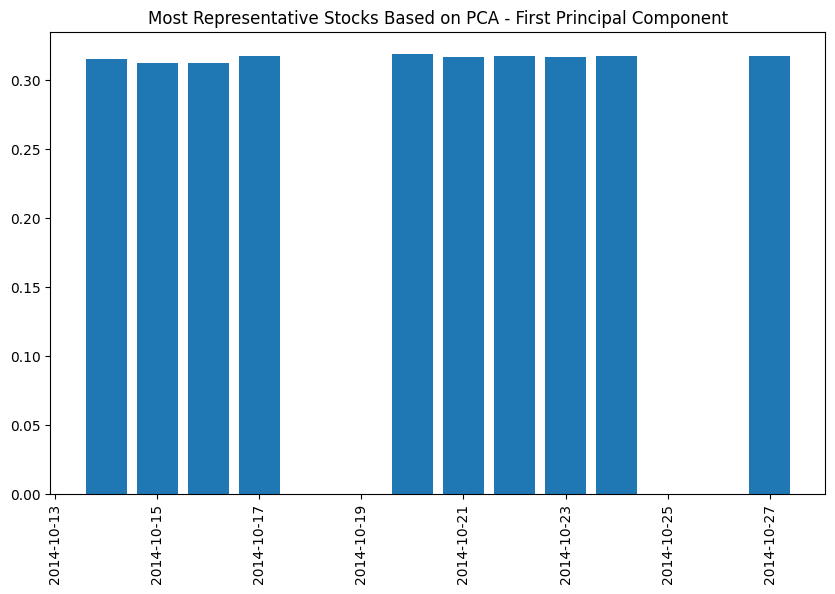

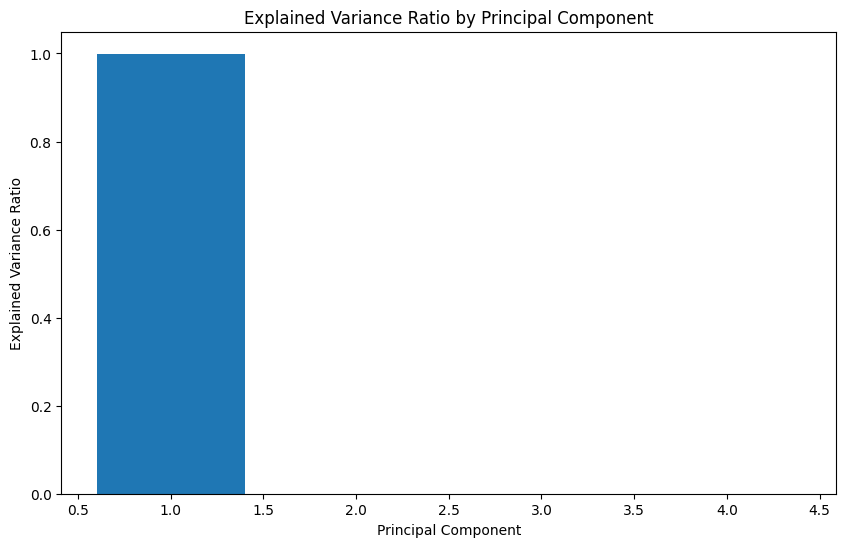

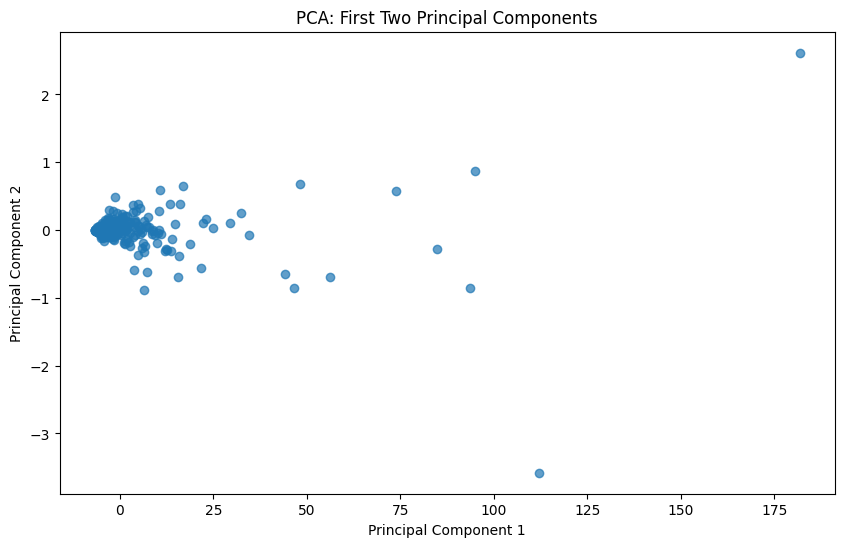

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas_datareader.data as pdr


# Compute daily returns (percentage change) for each stock, including SPY
returns = df.pct_change().dropna()

# Visualize the data before PCA (using the correlation matrix)
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of Stock Returns')
plt.imshow(returns.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(returns.columns)), returns.columns, rotation=90)
plt.yticks(range(len(returns.columns)), returns.columns)
plt.show()

# Perform PCA to find the most representative stocks of the index
pca = PCA(n_components=4)  # Adjust n_components as needed
pca.fit(returns)

# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Get the loadings (how each stock contributes to each component)
loadings = pca.components_

# Sort the loadings to find the stocks most contributing to the first principal component
pc1_loadings = loadings[0]  # Loadings for the first principal component
sorted_loadings = pd.Series(pc1_loadings, index=returns.columns).sort_values(ascending=False)

# Show the most representative stocks based on the first principal component
print("Most representative stocks of the S&P 500 index based on PCA:")
print(sorted_loadings.head())

# Plot the first principal component to visualize the most representative stocks
plt.figure(figsize=(10, 6))
plt.bar(sorted_loadings.index, sorted_loadings.values)
plt.title('Most Representative Stocks Based on PCA - First Principal Component')
plt.xticks(rotation=90)
plt.show()

# Visualize the variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the first two principal components
pca_2d = pca.transform(returns)
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\630052265.py:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = top_stocks_df.pct_change().dropna()


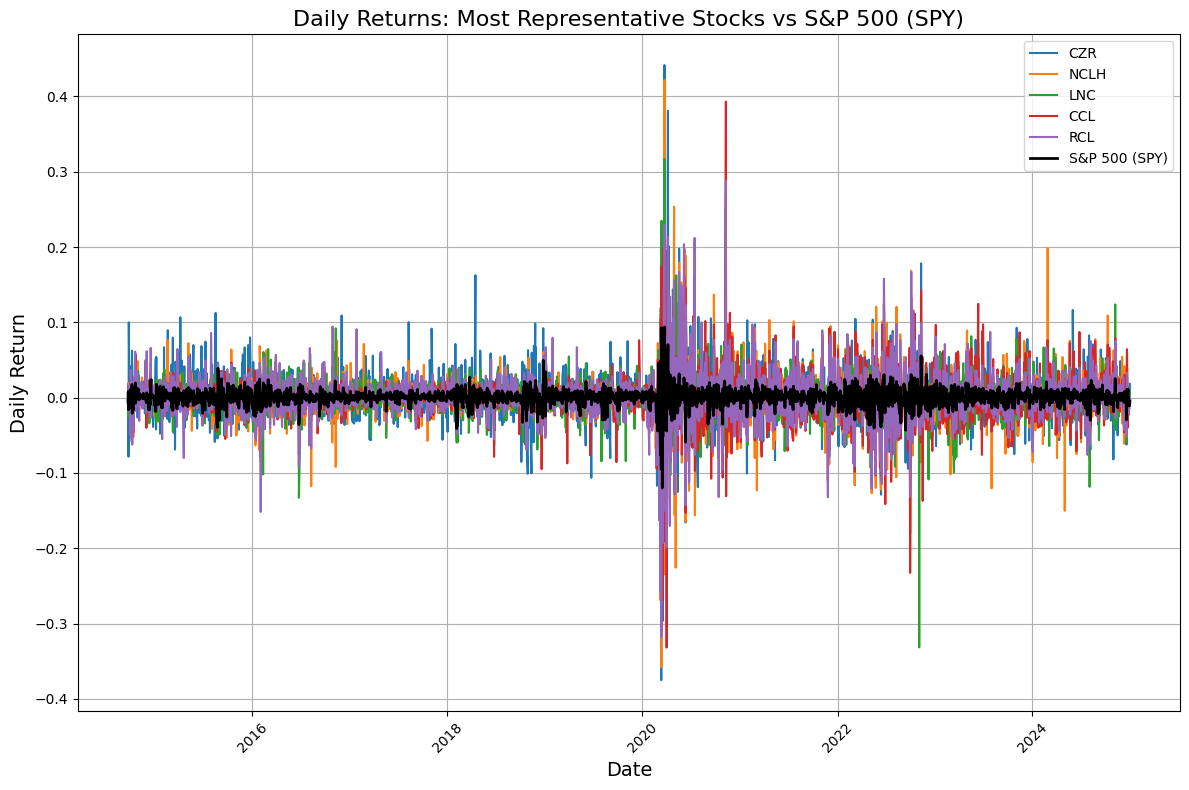

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

# Define the start and end date for the data fetching
start_date = '2010-01-01'
end_date = '2025-01-01'

# Define your DataFrame df (assuming it is already populated with stock data)
# Here, we directly fetch the data for top 5 most representative stocks based on PCA and SPY
top_stocks = ['CZR', 'NCLH', 'LNC', 'CCL', 'RCL']  # Based on PCA analysis

# Fetch SPY data (S&P 500 index)
try:
    spy = pdr.get_data_stooq("^SPX", start=start_date, end=end_date)["Close"]
except Exception as e:
    print(f"Failed to download SPY data from Stooq: {e}")
    raise

# Fetch data for the top representative stocks
top_stocks_data = {}
for ticker in top_stocks:
    try:
        stock_data = pdr.get_data_stooq(ticker, start=start_date, end=end_date)["Close"]
        top_stocks_data[ticker] = stock_data
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")
        raise

# Convert the dictionary to a DataFrame
top_stocks_df = pd.DataFrame(top_stocks_data)

# Add SPY data to the DataFrame
top_stocks_df['SPY'] = spy

# Compute daily returns for each stock and SPY
returns = top_stocks_df.pct_change().dropna()

# Plot the returns for the most representative stocks and SPY for comparison
plt.figure(figsize=(12, 8))

# Plot each stock's return
for ticker in top_stocks:
    plt.plot(returns.index, returns[ticker], label=ticker)

# Plot SPY returns for comparison
plt.plot(returns.index, returns['SPY'], label='S&P 500 (SPY)', color='black', linewidth=2)

# Add title and labels
plt.title('Daily Returns: Most Representative Stocks vs S&P 500 (SPY)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
import time
import numpy as np
import pandas as pd
from typing import Union, Dict, Optional
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # For parallel distance computations


class TimeSeriesClustering:
    def __init__(self, df: pd.DataFrame, random_state: Optional[int] = 42):
        """
        Initialize clustering object with validation

        Args:
            df: DataFrame with rows as time series (tickers) and columns as timestamps
            random_state: Seed for reproducibility
        """
        self.random_state = random_state
        self.rng = check_random_state(random_state)
        
        # Validate and store data
        self._validate_data(df)
        self.raw_data = df.copy()
        self.processed_data = None
        self.distance_matrices = {}  # Cache for distance matrices

    def _validate_data(self, df: pd.DataFrame) -> None:
        """Comprehensive data validation"""
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame")
            
        if df.empty:
            raise ValueError("Input DataFrame is empty")
            
        if not df.apply(lambda s: pd.api.types.is_numeric_dtype(s)).all():
            raise ValueError("All DataFrame columns must be numeric")
            
        if df.isna().any().any():
            raise ValueError("Data contains missing values. Handle missing values first.")
            
        if np.isinf(df.values).any():
            raise ValueError("Data contains infinite values")

    def preprocess(self, method: str = 'pct_change', **kwargs) -> None:
        """
        Preprocess time series data with proper look-forward protection
        
        Args:
            method: Preprocessing method ('pct_change' or 'standardize')
            kwargs: Additional arguments for preprocessing
        """
        if method == 'pct_change':
            # Compute percentage change across time (axis=1)
            processed = self.raw_data.pct_change(axis=1, **kwargs)
            
            # Handle NaNs by forward filling (no look-ahead bias)
            processed = processed.ffill(axis=1).bfill(axis=1)  # Handle initial NaN
            
        elif method == 'standardize':
            # Z-score standardization per time series
            means = self.raw_data.mean(axis=1)
            stds = self.raw_data.std(axis=1)
            processed = (self.raw_data.sub(means, axis=0)).div(stds, axis=0)
            
        elif method == 'returns_standardize':
            # First compute returns
            returns = self.raw_data.pct_change(axis=1, **kwargs)
            # Then standardize the returns
            means = returns.mean(axis=1)
            stds = returns.std(axis=1)
            processed = (returns.sub(means, axis=0)).div(stds, axis=0)
            processed = processed.ffill(axis=1).bfill(axis=1)
            
        else:
            raise ValueError(f"Unknown preprocessing method: {method}")
        
        self.processed_data = processed.dropna(axis=1)  # Remove columns with remaining NaNs

    def _compute_distance_matrix(self, metric: str = 'euclidean', **dtw_args) -> np.ndarray:
        """
        Compute distance matrix with caching and parallel processing
        
        Args:
            metric: Distance metric ('euclidean' or 'fastdtw')
            dtw_args: Additional arguments for FastDTW
        """
        if metric not in ['euclidean', 'fastdtw']:
            raise ValueError(f"Unsupported distance metric: {metric}")

        # Check cache first
        cache_key = f"{metric}_{hash(frozenset(dtw_args.items()))}"
        if cache_key in self.distance_matrices:
            return self.distance_matrices[cache_key]

        data = self.processed_data.values
        
        if metric == 'euclidean':
            distances = pdist(data, metric='euclidean')
        else:
            # Parallel FastDTW computation
            n_samples = data.shape[0]
            indices = np.triu_indices(n_samples, k=1)
            
            def _parallel_dtw(i, j):
                return fastdtw(data[i], data[j], **dtw_args)[0]

            results = Parallel(n_jobs=-1)(
                delayed(_parallel_dtw)(i, j) 
                for i, j in zip(indices[0], indices[1])
            )
            
            distances = np.array(results)

        # Cache and return squareform matrix
        self.distance_matrices[cache_key] = squareform(distances)
        return self.distance_matrices[cache_key]

    def hierarchical_clustering(
        self,
        n_clusters: int,
        metric: str = 'euclidean',
        linkage_method: str = 'ward',
        **dtw_args
    ) -> Dict:
        """Hierarchical clustering with automatic method selection"""
        if metric == 'fastdtw' and linkage_method == 'ward':
            raise ValueError("Ward linkage can't be used with non-Euclidean distances")

        distance_matrix = self._compute_distance_matrix(metric, **dtw_args)
        Z = linkage(distance_matrix, method=linkage_method)
        clusters = fcluster(Z, n_clusters, criterion='maxclust')
        
        # Silhouette score calculation
        sil_score = self._calculate_silhouette(clusters, distance_matrix, metric)
        
        return {
            'linkage_matrix': Z,
            'clusters': clusters,
            'silhouette_score': sil_score,
            'n_clusters': len(np.unique(clusters))
        }

    def kmeans_clustering(
        self,
        n_clusters: int,
        init: str = 'k-means++',
        n_init: int = 10,
        **kwargs
    ) -> Dict:
        """KMeans clustering with proper initialization"""
        model = KMeans(
            n_clusters=n_clusters,
            init=init,
            n_init=n_init,
            random_state=self.random_state,
            **kwargs
        )
        
        clusters = model.fit_predict(self.processed_data.values)
        
        return {
            'clusters': clusters,
            'silhouette_score': silhouette_score(
                self.processed_data.values, 
                clusters,
                metric='euclidean'
            ),
            'inertia': model.inertia_,
            'n_clusters': n_clusters
        }

    def dbscan_clustering(
        self,
        eps: float,
        min_samples: int = 5,
        metric: str = 'euclidean',
        **dtw_args
    ) -> Dict:
        """DBSCAN clustering with proper distance matrix handling"""
        distance_matrix = self._compute_distance_matrix(metric, **dtw_args)
        model = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric='precomputed',
            n_jobs=-1
        )
        
        clusters = model.fit_predict(distance_matrix)
        n_clusters = len(np.unique(clusters)) - (1 if -1 in clusters else 0)
        
        return {
            'clusters': clusters,
            'silhouette_score': self._calculate_silhouette(clusters, distance_matrix, metric),
            'n_clusters': n_clusters,
            'core_sample_indices': model.core_sample_indices_
        }

    def _calculate_silhouette(
        self,
        clusters: np.ndarray,
        distance_matrix: np.ndarray,
        metric: str
    ) -> float:
        """Safe silhouette score calculation"""
        unique_clusters = np.unique(clusters)
        if len(unique_clusters) < 2:
            return np.nan
        
        # Handle noise points in DBSCAN
        mask = clusters != -1 if -1 in clusters else slice(None)
        
        if metric == 'euclidean':
            return silhouette_score(
                self.processed_data.values[mask],
                clusters[mask],
                metric='euclidean'
            )
        else:
            return silhouette_score(
                distance_matrix[mask][:, mask],
                clusters[mask],
                metric='precomputed'
            )

    def plot_elbow(self, max_clusters: int = 15) -> None:
        """Improved elbow method with automatic knee detection"""
        inertias = []
        for k in range(1, max_clusters + 1):
            model = KMeans(
                n_clusters=k,
                random_state=self.random_state,
                n_init='auto'
            ).fit(self.processed_data.values)
            inertias.append(model.inertia_)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, max_clusters + 1), inertias, 'bo-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal K')
        plt.grid(True)
        plt.show()

    def plot_dendrogram(
        self,
        linkage_matrix: np.ndarray,
        title: str = "Hierarchical Clustering Dendrogram",
        **kwargs
    ) -> None:
        """Enhanced dendrogram visualization"""
        plt.figure(figsize=(15, 8))
        dendrogram(
            linkage_matrix,
            labels=self.processed_data.index.tolist(),
            orientation='top',
            **kwargs
        )
        plt.title(title)
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    def analyze_clusters(self, clusters: np.ndarray) -> pd.DataFrame:
        """Comprehensive cluster analysis"""
        analysis = []
        for cluster_id in np.unique(clusters):
            mask = clusters == cluster_id
            cluster_data = self.raw_data[mask]
            
            stats = {
                'cluster': cluster_id,
                'size': cluster_data.shape[0],
                'mean_return': cluster_data.pct_change(axis=1).mean().mean(),
                'volatility': cluster_data.pct_change(axis=1).std().mean(),
                'total_return': (cluster_data.iloc[:, -1] / cluster_data.iloc[:, 0] - 1).mean()
            }
            
            analysis.append(stats)
            
        return pd.DataFrame(analysis).set_index('cluster')


In [42]:
# Initialize the DTWClustering with the sliced DataFrame
clustering = TimeSeriesClustering(df)
clustering.preprocess(method='pct_change')



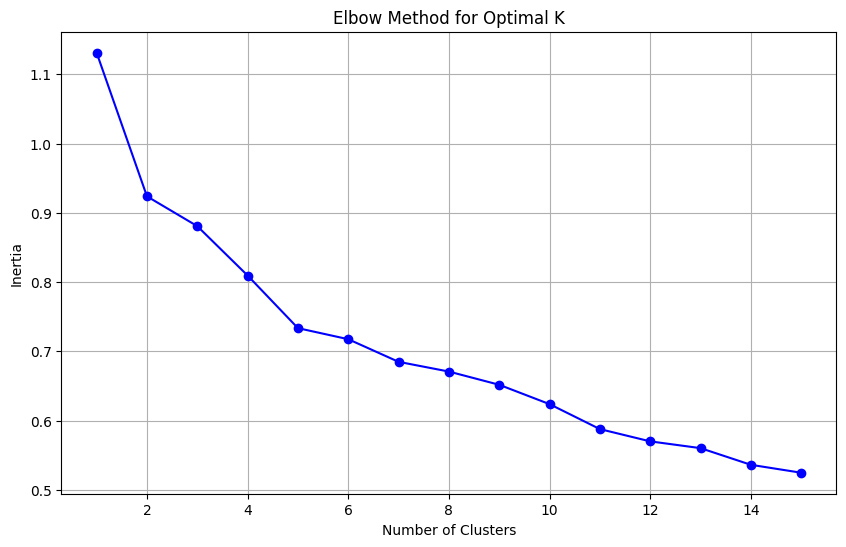

In [43]:
#elbow method for kmeans clustering
clustering.kmeans_clustering(n_clusters=5)
clustering.plot_elbow(max_clusters=15)

In [44]:
# Hierarchical Clustering with FastDTW Distance
print("\nHierarchical Clustering with FastDTW Distance:")
hierarchical_dtw= clustering.hierarchical_clustering(
    n_clusters=2, metric='fastdtw', linkage_method='complete' 
)



Hierarchical Clustering with FastDTW Distance:


C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\3546897724.py:136: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=linkage_method)


Silhouette Score: 0.7660
Number of Clusters: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


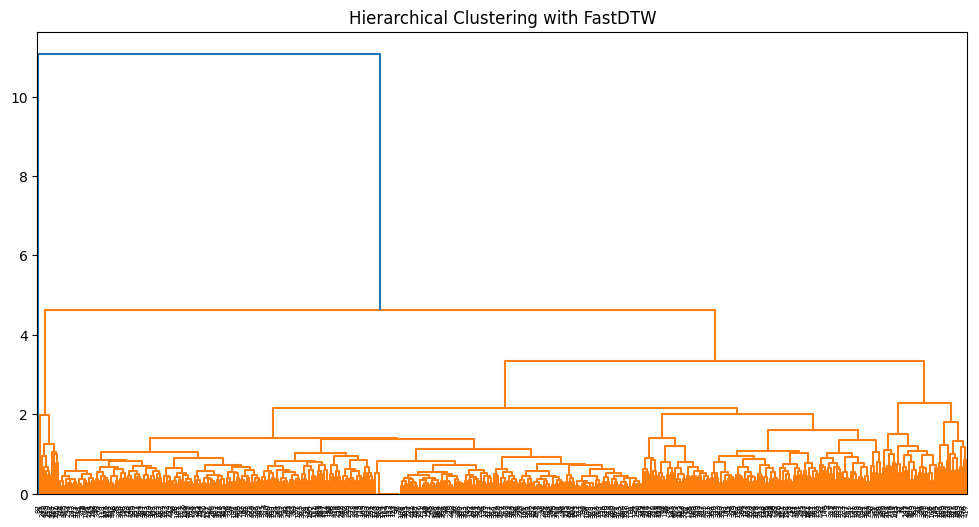

In [45]:
# results
dtw_clusters = hierarchical_dtw['clusters']-1
dtw_silhouette = hierarchical_dtw['silhouette_score']
dtw_Z = hierarchical_dtw['linkage_matrix']
print(f"Silhouette Score: {dtw_silhouette:.4f}")
print(f"Number of Clusters: {hierarchical_dtw['n_clusters']}")
print(dtw_clusters)

# Visualizzare il dendrogramma se necessario
plt.figure(figsize=(12, 6))
dendrogram(dtw_Z)
plt.title('Hierarchical Clustering with FastDTW')
plt.show()

In [46]:
# Hierarchical Clustering with Euclidean Distance
print("\nHierarchical Clustering with Euclidean Distance:")
hierarchical_euclidean = clustering.hierarchical_clustering(
    n_clusters=2, metric='euclidean', linkage_method='ward'
)

#print(hierarchical_euclidean)


Hierarchical Clustering with Euclidean Distance:


C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\3546897724.py:136: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=linkage_method)


Silhouette Score: 0.3443
Number of Clusters: 2
[1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


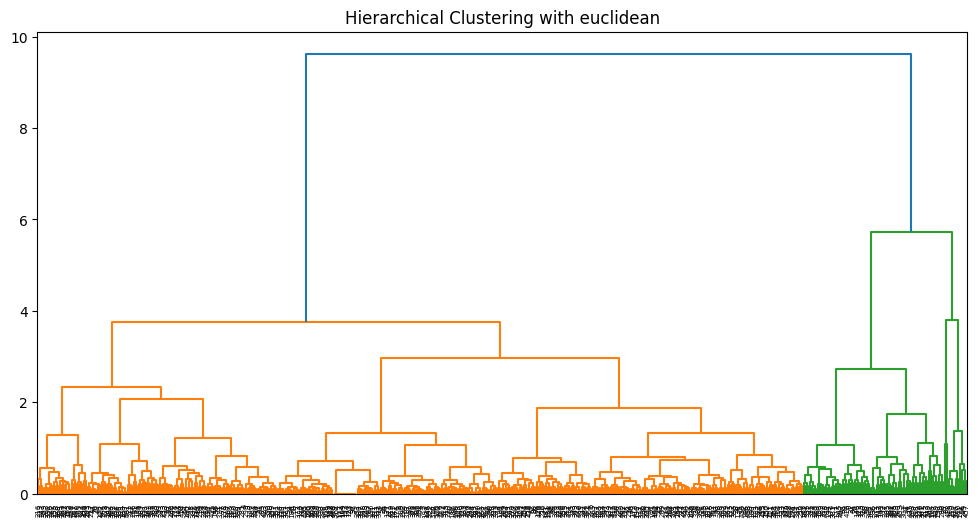

In [47]:
# results
euclidean_clusters = hierarchical_euclidean['clusters']-1
euclidean_silhouette = hierarchical_euclidean['silhouette_score']
euclidean_Z = hierarchical_euclidean['linkage_matrix']
print(f"Silhouette Score: {euclidean_silhouette:.4f}")
print(f"Number of Clusters: {hierarchical_euclidean['n_clusters']}")
print(euclidean_clusters)

# Visualizzare il dendrogramma se necessario
plt.figure(figsize=(12, 6))
dendrogram(euclidean_Z)
plt.title('Hierarchical Clustering with euclidean')
plt.show()

In [48]:
# KMeans Clustering with Euclidean Distance
print("\nKMeans Clustering with Euclidean Distance:")
kmeans_euclidean = clustering.kmeans_clustering(
    n_clusters=2, init='k-means++', n_init=10
)




KMeans Clustering with Euclidean Distance:


In [49]:
# results
kmeans_clusters = kmeans_euclidean['clusters']
kmeans_silhouette = kmeans_euclidean['silhouette_score']
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Number of Clusters: {kmeans_euclidean['n_clusters']}")
print(kmeans_clusters)


Silhouette Score: 0.2406
Number of Clusters: 2
[0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1]


In [50]:

# Analyze clusters for both hierarchical methods
print("\nCluster Analysis for Euclidean Hierarchical Clustering:")
euclidean_analysis = clustering.analyze_clusters(hierarchical_euclidean['clusters'])
print(euclidean_analysis)

print("\nCluster Analysis for FastDTW Hierarchical Clustering:")
fastdtw_analysis = clustering.analyze_clusters(hierarchical_dtw['clusters'])
print(fastdtw_analysis)


Cluster Analysis for Euclidean Hierarchical Clustering:
         size  mean_return  volatility  total_return
cluster                                             
1         386     0.005442    0.011326      0.049676
2          83     0.010573    0.024220      0.098468

Cluster Analysis for FastDTW Hierarchical Clustering:
         size  mean_return  volatility  total_return
cluster                                             
1         468     0.006304    0.014878      0.057888
2           1     0.027988         NaN      0.256214


In [59]:
df_actual=df
df_pct=df_actual.pct_change(axis=1)


In [60]:
df_actual

Date,2014-10-14 00:00:00+00:00,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,,
TSLA,15.137333,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000
MLM,98.845337,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703
POOL,47.631180,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621
PAYX,31.855057,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584
JCI,29.054077,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816
...,...,...,...,...,...,...,...,...,...,...
NUE,38.207870,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775
JBHT,66.783379,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602
AMAT,16.996983,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028


In [61]:
df_pct.dropna(axis=1, inplace=True)
df_pct

Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,
TSLA,0.011627,-0.014584,0.004992,0.013144,0.021131,-0.018016,0.018131,-0.000212,-0.057686
MLM,0.018070,0.036322,0.039199,0.016056,0.012207,-0.014538,0.018273,0.011936,-0.018791
POOL,0.007124,0.069992,-0.010264,0.010547,0.016698,-0.012147,0.010218,-0.009430,-0.001557
PAYX,-0.011254,0.000929,0.009515,0.005747,0.021257,0.000672,0.006710,0.010664,0.006155
JCI,-0.018645,-0.000513,0.032365,-0.000746,0.018426,-0.015717,0.023703,0.013649,-0.004568
...,...,...,...,...,...,...,...,...,...
NUE,0.001224,0.009782,0.007265,0.011421,0.023970,0.000387,-0.011410,0.032668,-0.011176
JBHT,0.002450,0.014528,0.002543,-0.000668,0.027786,-0.002080,0.009899,-0.002579,0.012154
AMAT,0.004654,0.022645,0.000503,0.009557,0.035377,-0.013956,0.020009,0.004307,0.002382


In [64]:
df_actual_new=df_actual.iloc[:, 1:]
df_actual_new

Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,
TSLA,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000
MLM,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703
POOL,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621
PAYX,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584
JCI,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816
...,...,...,...,...,...,...,...,...,...
NUE,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775
JBHT,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602
AMAT,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028


In [ ]:
kmeans_clusters_transposed=kmeans_clusters.T
dtw_clusters_transposed=dtw_clusters.T
euclidean_clusters_transposed=euclidean_clusters.T


In [66]:
clustering_columns = pd.DataFrame({
    'kmeans': kmeans_clusters,
    'dtw': dtw_clusters,
    'euclidean hierarchical': euclidean_clusters
})
clustering_columns

,kmeans,dtw,euclidean hierarchical
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
464,1,0,0
465,1,0,0
466,0,0,0
467,1,0,0


In [68]:
df_actual_new

Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00
Ticker,,,,,,,,,
TSLA,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000
MLM,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703
POOL,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621
PAYX,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584
JCI,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816
...,...,...,...,...,...,...,...,...,...
NUE,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775
JBHT,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602
AMAT,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028


In [72]:
df_actual_new['kmeans'] = kmeans_clusters
df_actual_new['dtw'] = dtw_clusters
df_actual_new['euclidean hierarchical'] = euclidean_clusters
df_actual_new



C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_15744\314139839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual_new['kmeans'] = kmeans_clusters


Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00,kmeans,dtw,euclidean hierarchical
Ticker,,,,,,,,,,,,
TSLA,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000,0,0,1
MLM,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703,0,0,1
POOL,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621,0,0,1
PAYX,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584,1,0,0
JCI,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
NUE,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775,1,0,0
JBHT,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602,1,0,0
AMAT,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028,0,0,0


In [73]:
df_pct['kmeans'] = kmeans_clusters
df_pct['dtw'] = dtw_clusters
df_pct['euclidean hierarchical'] = euclidean_clusters
df_pct

Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00,kmeans,dtw,euclidean hierarchical
Ticker,,,,,,,,,,,,
TSLA,0.011627,-0.014584,0.004992,0.013144,0.021131,-0.018016,0.018131,-0.000212,-0.057686,0,0,1
MLM,0.018070,0.036322,0.039199,0.016056,0.012207,-0.014538,0.018273,0.011936,-0.018791,0,0,1
POOL,0.007124,0.069992,-0.010264,0.010547,0.016698,-0.012147,0.010218,-0.009430,-0.001557,0,0,1
PAYX,-0.011254,0.000929,0.009515,0.005747,0.021257,0.000672,0.006710,0.010664,0.006155,1,0,0
JCI,-0.018645,-0.000513,0.032365,-0.000746,0.018426,-0.015717,0.023703,0.013649,-0.004568,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
NUE,0.001224,0.009782,0.007265,0.011421,0.023970,0.000387,-0.011410,0.032668,-0.011176,1,0,0
JBHT,0.002450,0.014528,0.002543,-0.000668,0.027786,-0.002080,0.009899,-0.002579,0.012154,1,0,0
AMAT,0.004654,0.022645,0.000503,0.009557,0.035377,-0.013956,0.020009,0.004307,0.002382,0,0,0


In [74]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_cluster_timeseries(df_actual, df_pct, clustering_columns):
    """
    Plots the time series of tickers in each cluster for both actual values and pct change values.
    
    Args:
    - df_actual (pd.DataFrame): Dataframe containing actual values with tickers as rows and timestamps as columns.
    - df_pct (pd.DataFrame): Dataframe containing percentage change values with tickers as rows and timestamps as columns.
    - clustering_columns (list): List of column names corresponding to the clustering algorithms.
    
    Returns:
    - None
    """
    
    # Iterate over each clustering type (one column for each clustering algorithm)
    for clustering_col in clustering_columns:
        # Get unique clusters
        clusters = df_actual[clustering_col].unique()
        num_clusters = len(clusters)

        # Set number of rows and columns: 2 rows per cluster (one for actual, one for pct change)
        nrows = num_clusters  # One row per cluster
        ncols = 2  # Two columns (one for actual, one for pct change)

        # Create figure with appropriate size
        plt.figure(figsize=(18, 5 * num_clusters))  # Adjust the size for multiple rows

        plt.suptitle(f"Cluster Timeseries for {clustering_col}", fontsize=16)

        # Plot actual values for each cluster (first column)
        for idx, cluster in enumerate(clusters):
            tickers_in_cluster = df_actual[df_actual[clustering_col] == cluster].index
            df_cluster_actual = df_actual.loc[tickers_in_cluster].drop(columns=[clustering_col])

            if not df_cluster_actual.empty:
                ax = plt.subplot(nrows, ncols, idx * 2 + 1)  # First column for actual values
                df_cluster_actual.transpose().plot(title=f"Cluster {cluster} - Actual", ax=ax, legend = False)
                ax.set_xlabel('')  # Hide x-axis label
                ax.set_ylabel('')  # Hide y-axis label
                ax.set_xticks([])  # Remove x-axis ticks (no tick marks)
                ax.set_xticklabels([])  # Remove x-axis labels (no tick labels)
        
        # Plot pct change values for each cluster (second column)
        for idx, cluster in enumerate(clusters):
            tickers_in_cluster = df_pct[df_pct[clustering_col] == cluster].index
            df_cluster_pct = df_pct.loc[tickers_in_cluster].drop(columns=[clustering_col])

            if not df_cluster_pct.empty:
                ax = plt.subplot(nrows, ncols, idx * 2 + 2)  # Second column for pct change
                df_cluster_pct.transpose().plot(title=f"Cluster {cluster} - % Change", ax=ax, legend = False)
                ax.set_xlabel('')  # Hide x-axis label
                ax.set_ylabel('')  # Hide y-axis label
                ax.set_xticks([])  # Remove x-axis ticks (no tick marks)
                ax.set_xticklabels([])  # Remove x-axis labels (no tick labels)
        
        # Adjust layout to be more spacious
        plt.tight_layout(pad=4.0, rect=[0, 0, 1, 0.95])  # Increase the pad for more space
        plt.show()



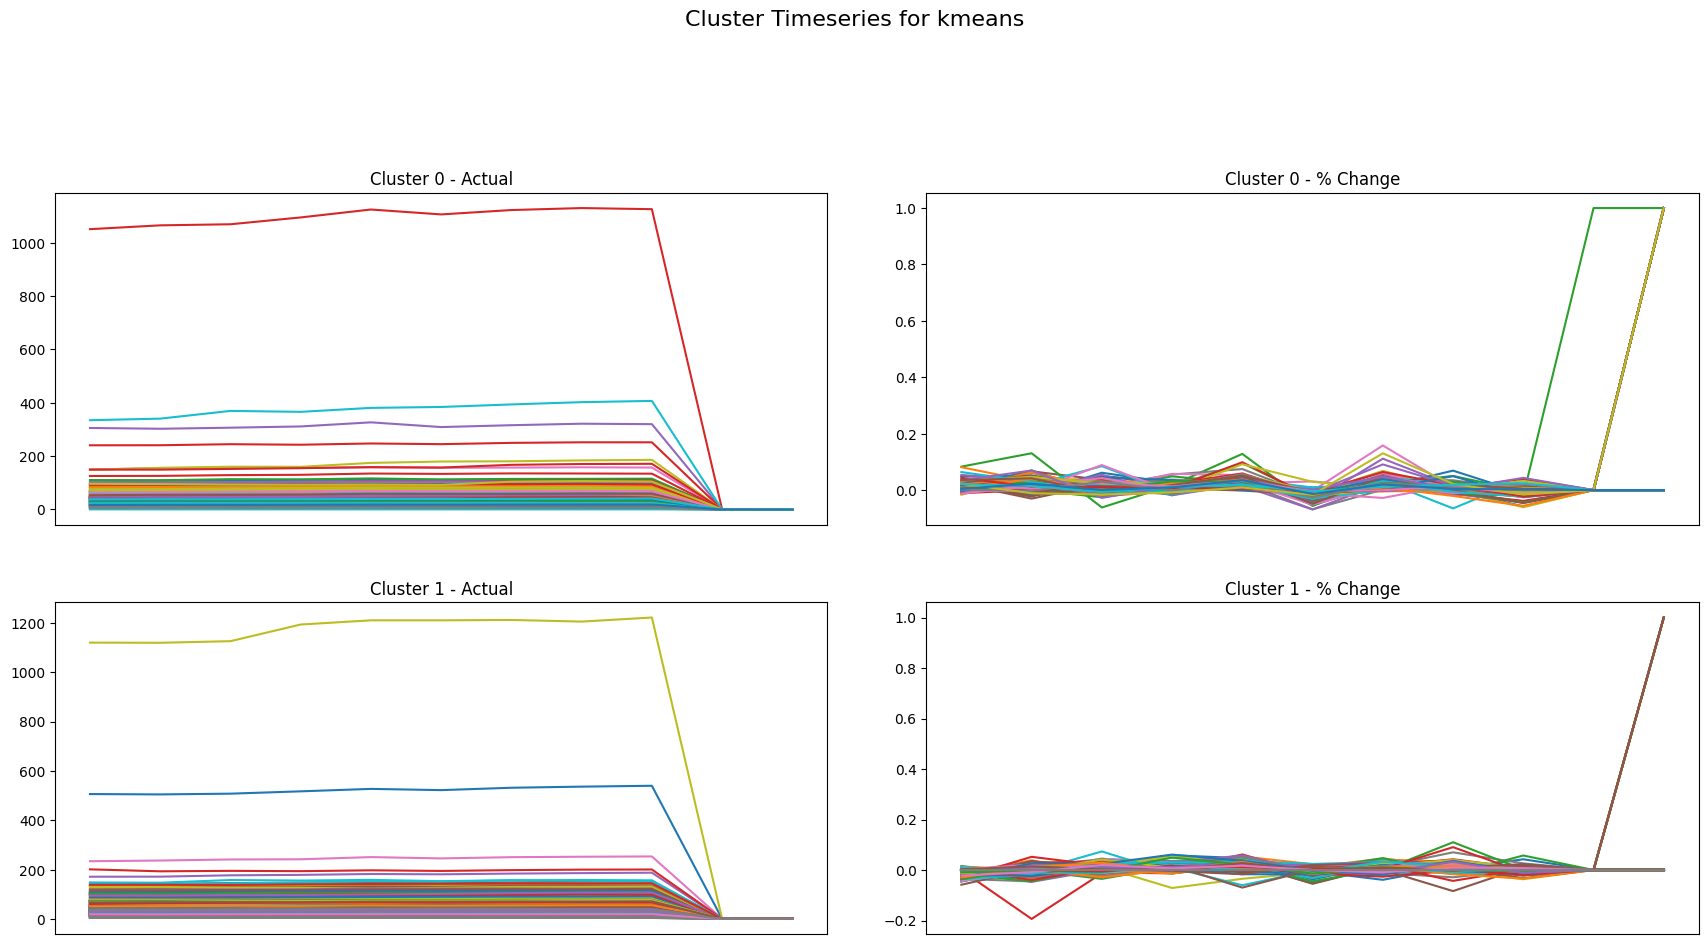

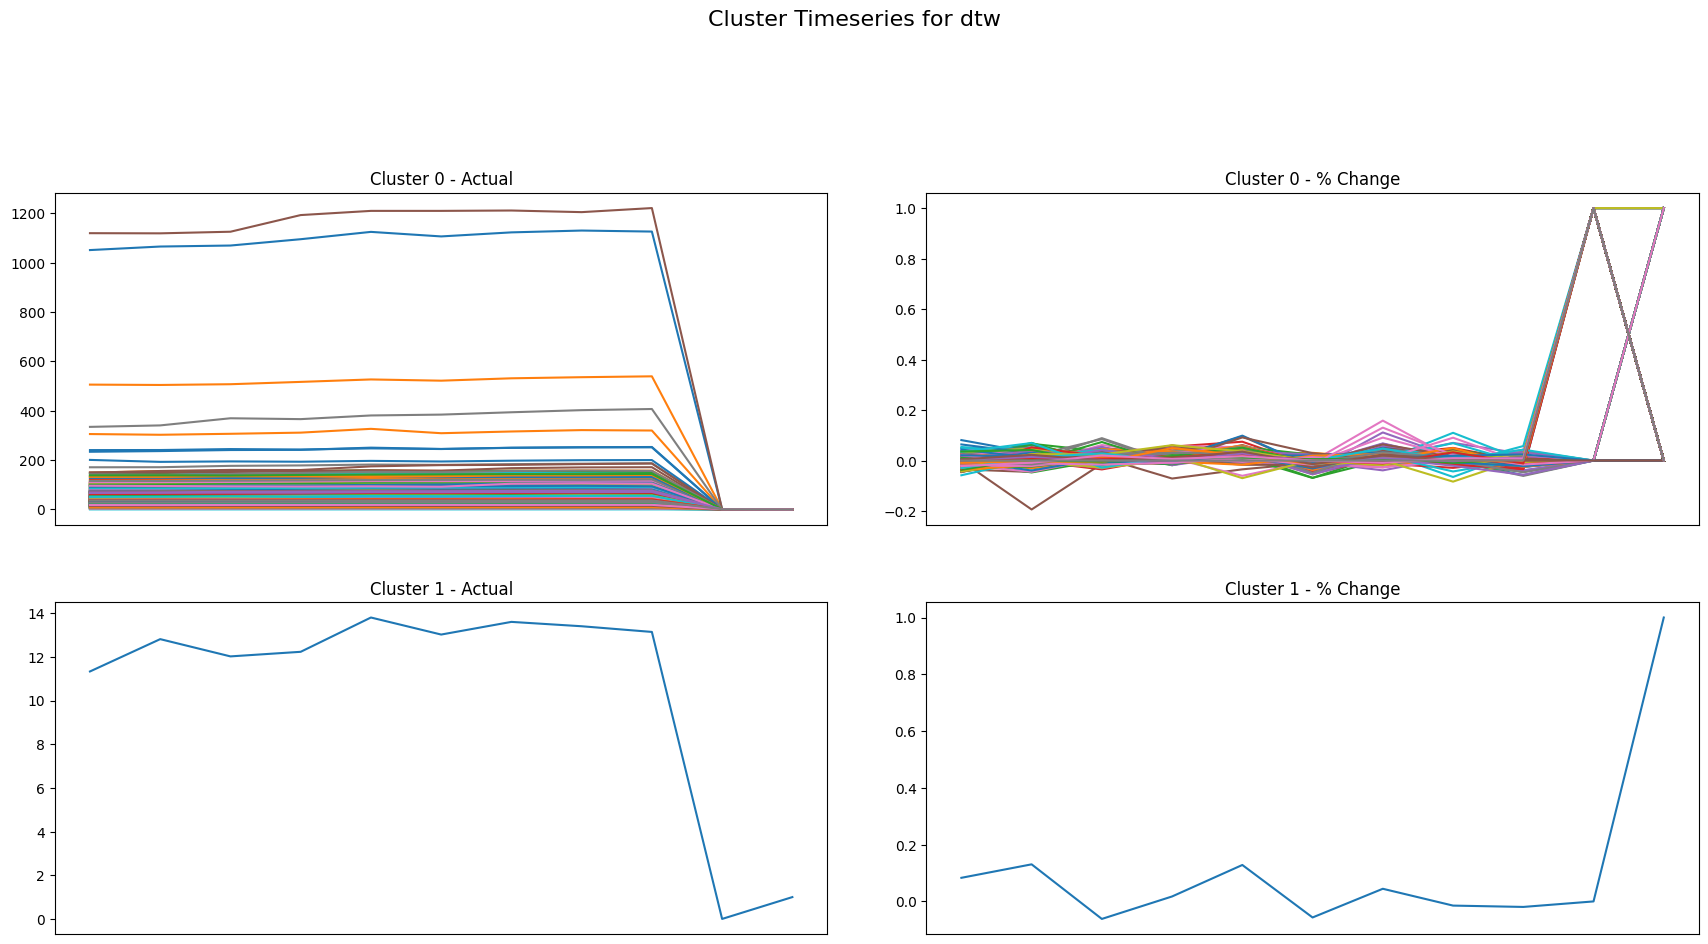

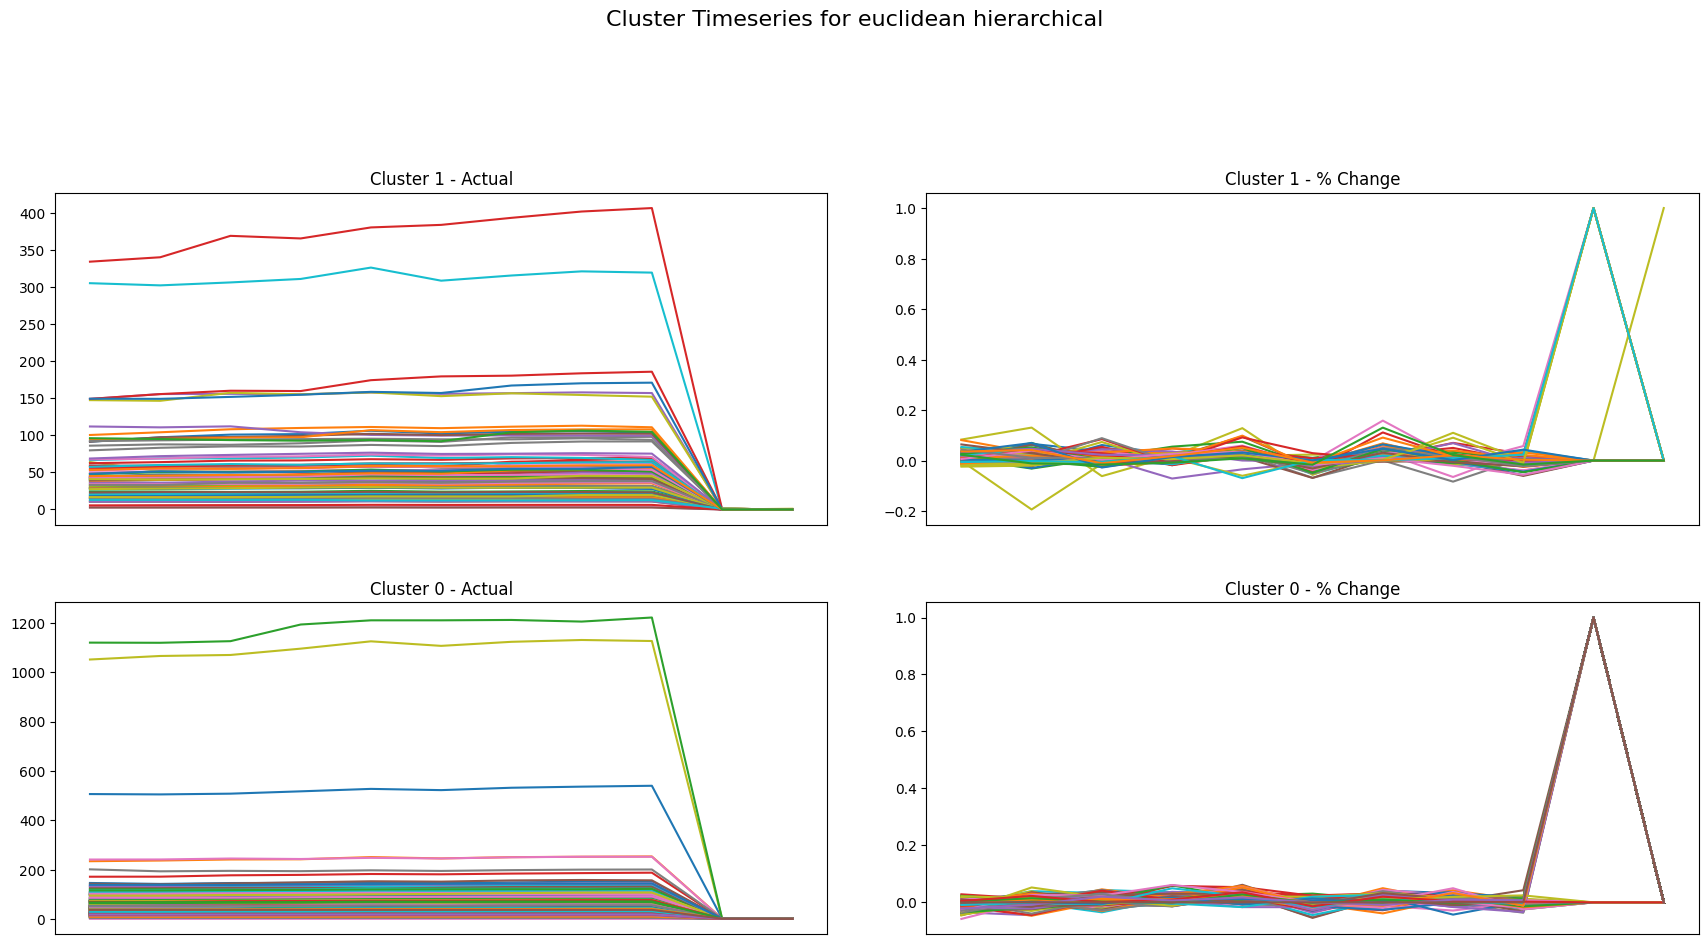

In [75]:
# Example usage:
# Assuming `df_actual` and `df_pct` are your dataframes containing the actual values and percentage change values, respectively.
# Also assuming the clustering columns are named 'clustering_type_1', 'clustering_type_2', and 'clustering_type_3'.

plot_cluster_timeseries(df_actual_new, df_pct, clustering_columns)



In [87]:
def get_representative_assets(df_timeseries, cluster_labels, top_n=5):
    """
    Seleziona le top_n azioni più vicine al centroide di ciascun cluster e restituisce una lista unica.

    Args:
        df_timeseries (pd.DataFrame): Serie temporali con tickers come indice.
        cluster_labels (array-like): Vettore dei cluster (stesso ordine del df).
        top_n (int): Numero di asset da prendere per cluster.

    Returns:
        list: Lista unica di tickers selezionati (rappresentativi).
    """
    df = df_timeseries.copy()
    df['cluster'] = cluster_labels
    representatives = []

    for cluster_id in np.unique(cluster_labels):
        df_cluster = df[df['cluster'] == cluster_id].drop(columns='cluster')
        centroid = df_cluster.mean(axis=0)
        distances = df_cluster.apply(lambda row: np.linalg.norm(row - centroid), axis=1)
        top_assets = distances.nsmallest(top_n).index.tolist()
        representatives.extend(top_assets)  # Aggiunge direttamente alla lista finale

    return representatives


In [ ]:
# I decided to use the original values for the representative assets.


df_actual_no_labels = df_actual_new.drop(columns='dtw')
df_actual_no_labels = df_actual_no_labels.drop(columns='kmeans')
df_actual_no_labels = df_actual_no_labels.drop(columns='euclidean hierarchical')

# Applica la funzione:
# Esempio: df_actual contiene le serie temporali, dtw_labels è il clustering
selected_stocks = get_representative_assets(df_actual, dtw_clusters, top_n=5)

print(selected_stocks)





['DLTR', 'CAH', 'TAP', 'EMN', 'CRM', 'ENPH']


FORECAST USING ARIMA


In [ ]:
#import libraries 
import os 
import time 
df_for_ARIMA=df_actual_no_labels.loc[selected_stocks]
print(df_for_ARIMA) 



Ticker                          DLTR        CAH        TAP        EMN  \
Date                                                                    
2014-10-15 00:00:00+00:00  55.240002  55.064140  54.366096  54.475533   
2014-10-16 00:00:00+00:00  55.049999  54.236980  54.095703  55.120602   
2014-10-17 00:00:00+00:00  56.580002  55.357380  55.638565  55.713783   
2014-10-20 00:00:00+00:00  57.340000  55.725842  55.853310  56.269867   
2014-10-21 00:00:00+00:00  58.130001  57.019157  57.133698  57.908535   
2014-10-22 00:00:00+00:00  57.560001  57.146980  56.211174  57.560032   
2014-10-23 00:00:00+00:00  58.509998  57.485340  56.736069  57.834370   
2014-10-24 00:00:00+00:00  58.939999  57.974121  58.239174  57.508118   
2014-10-27 00:00:00+00:00  58.799999  58.959145  57.475681  55.120602   

Ticker                           CRM   ENPH  
Date                                         
2014-10-15 00:00:00+00:00  52.855358  11.33  
2014-10-16 00:00:00+00:00  53.631908  12.81  
2014-10-17 0

In [ ]:
#check stationarity
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_for_ARIMA.iloc[:,0])
result

ValueError: x is required to have ndim 1 but has ndim 2

In [ ]:
#portfolio optimization
#importing libraries
import numpy as np
import cvxpy as cp
# Initial data (example)
n = len(selected_stocks) # Number of selected representatives 

# Expected returns for stocks (example, replace with real data)
R = np.random.uniform(0.02, 0.15, n)  # Expected returns between 2% and 15%

# Original weights of the index
w_index = np.random.uniform(0.01, 0.05, n)  # Weights between 1% and 5% (example, replace with real data)

variances = np.random.uniform(0.01, 0.10, n)  #Portfolio variance (example)# Realistic variances (example, replace with real data)

# Price-to-book ratio for each stock
PB = np.random.uniform(1, 5, n)  # P/B ratios between 1 and 5 (example, replace with real data)
PB_index = np.dot(w_index, PB)  # Overall P/B ratio of the index (example, replace with real data)


# Tolerances and parameters
epsilon = 0.01  # Tolerance for the proportionality constraint
delta = 0.02    # Tolerance for the expected return constraint
lambda_risk = 0.5  # Risk weight in the objective function

k=0.5

# Decision variables
x = cp.Variable(n)
k=cp.Variable()

In [ ]:
# Objective function: maximize expected return minus variance
expected_return = R @ x  # Expected return of the portfolio
portfolio_variance = cp.sum(cp.multiply(variances, cp.square(x)))  # Variance as weighted sum of individual variances
objective = cp.Maximize(expected_return - lambda_risk * portfolio_variance)

In [ ]:
constraints = [
    cp.sum(x) == 1,  # Sum of weights = 1
    x >= 0,  # No negative weights
    cp.abs(x - cp.multiply(k,w_index)) <= epsilon,  # Proportionality constraint
    cp.abs(expected_return - np.dot(w_index, R)) <= delta,  # Return similarity constraint
    cp.sum(cp.multiply(x,PB)) <= PB_index  # P/B ratio constraint
]

In [ ]:
# Define and solve the problem
problem = cp.Problem(objective, constraints)


In [ ]:
Result=problem.solve()

In [ ]:
print(x.value)